<a href="https://colab.research.google.com/github/Edwardsmith35/Q-Learning-Grid-World-Problem-/blob/main/Q_learning_excercise_Grid_World.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Function to visualize the grid before the agent moves
def visualize_initial_grid(starting_location, ending_location, blocked_locations, rows, cols):
    # Create a grid representation
    grid = np.zeros((rows, cols))

    # Mark blocked locations
    for x, y in blocked_locations:
        grid[x, y] = -1

    # Mark the starting location
    grid[starting_location] = 2

    # Mark the goal location
    grid[ending_location] = 100

    # Plot the grid
    plt.figure(figsize=(rows, cols))
    plt.imshow(grid, cmap="viridis", origin="upper")

    # Add annotations
    for i in range(rows):
        for j in range(cols):
            if grid[i, j] == -1:
                plt.text(j, i, "X", ha="center", va="center", color="red", fontsize=12)
            elif grid[i, j] == 100:
                plt.text(j, i, "G", ha="center", va="center", color="green", fontsize=12)
            elif grid[i, j] == 2:
                plt.text(j, i, "S", ha="center", va="center", color="blue", fontsize=12)

    plt.title("Initial Grid (Before Movement)")
    plt.xticks(range(cols))
    plt.yticks(range(rows))
    plt.grid(color="black", linestyle="--", linewidth=0.5)
    plt.show()

# Function to visualize the grid after the agent moves
def visualize_final_grid(optimal_path, starting_location, ending_location, blocked_locations, rows, cols):
    # Create a grid representation
    grid = np.zeros((rows, cols))

    # Mark blocked locations
    for x, y in blocked_locations:
        grid[x, y] = -1

    # Mark the starting location
    grid[starting_location] = 2

    # Mark the goal location
    grid[ending_location] = 100

    # Mark the optimal path
    for x, y in optimal_path:
        grid[x, y] = 3  # Use a unique value for the path

    # Plot the grid
    plt.figure(figsize=(rows, cols))
    plt.imshow(grid, cmap="viridis", origin="upper")

    # Add annotations
    for i in range(rows):
        for j in range(cols):
            if grid[i, j] == -1:
                plt.text(j, i, "X", ha="center", va="center", color="red", fontsize=12)
            elif grid[i, j] == 100:
                plt.text(j, i, "G", ha="center", va="center", color="green", fontsize=12)
            elif grid[i, j] == 2:
                plt.text(j, i, "S", ha="center", va="center", color="blue", fontsize=12)
            elif grid[i, j] == 3:
                plt.text(j, i, "P", ha="center", va="center", color="orange", fontsize=12)

    plt.title("Final Grid (After Movement)")
    plt.xticks(range(cols))
    plt.yticks(range(rows))
    plt.grid(color="black", linestyle="--", linewidth=0.5)
    plt.show()


# Setting the parameters gamma and alpha for the Q-Learning
gamma = 0.75
alpha = 0.9

rows, cols = 5, 5

def define_2d_states(rows: int, cols: int) -> list:
    states = []
    for i in range(rows):
        for  j in range(cols):
            states.append((i, j))

    return states
states = define_2d_states(rows, cols)
#print(states)

blocked_locations = [(1, 1), (2, 3)]
states = [state for state in states if state not in blocked_locations]
print(states)

#define actions:
actions = ["up", "down", "left", "right"]

def make_action(action: str, states: list, location: tuple) -> tuple:
    x, y = location
    if action == "up":
        new_x, new_y = x-1, y
        if (new_x, new_y) in states:
            return (new_x, new_y)
        else: return (x, y)
    if action == "down":
        new_x, new_y = x+1, y
        if (new_x, new_y) in states:
            return (new_x, new_y)
        else: return (x, y)
    if action == "left":
        new_x, new_y = x, y-1
        if (new_x, new_y) in states:
            return (new_x, new_y)
        else: return (x, y)
    if action == "right":
        new_x, new_y = x, y+1
        if (new_x, new_y) in states:
            return (new_x, new_y)
        else: return (x, y)

#testing
#print(make_action("up", states, (2, 2)))  # Should return (1, 2)
#print(make_action("left", states, (0, 0)))  # Should return (0, 0) (invalid move)

#define the reward matrix which is a 2D matrix the same size as the states matrix
R = np.zeros([rows, cols]) - 1  # Default reward for each step is negative to ensure the agent chooses the shortest route
R[rows - 1, cols - 1] = 100  # Reward for reaching the goal
for x, y in blocked_locations:
    R[x, y] = -10  # Penalty for blocked states

print("Reward Matrix:\n", R)


action_to_index = {"up": 0, "down": 1, "left": 2, "right": 3}
index_to_action = {
  index: action for action, index in action_to_index.items()
}

starting_location = (0, 0)
ending_location = (4,4)
epochs = 1000
def train(epochs):
    Q = np.zeros((rows, cols, len(actions)))  # Q-table with dimensions (rows, cols, num_actions)
    for episode in range(epochs):
        current_state = starting_location
        while current_state != ending_location:
            # choose a random action
            action = np.random.choice(actions)
            action_index = action_to_index[action]
            # get the next state
            next_state = make_action(action, states, current_state)
            # Get the reward for the next state
            reward = R[next_state]
            # calculate current Q value
            current_Q_value = Q[current_state[0], current_state[1], action_index]
            # calculate the maximum Q value for the next state
            max_next_Q_value = np.max(Q[next_state[0], next_state[1], :])
            TD = reward + gamma * max_next_Q_value - current_Q_value
            # update the Q matrix
            Q[current_state[0], current_state[1], action_index] += alpha * TD
            # move to the next state
            current_state = next_state
    return Q

def get_optimal_path(starting_location: tuple, ending_location: tuple, Q) -> list:
    current_state = starting_location
    optimal_route = [starting_location]
    while current_state != ending_location:
        action_index = np.argmax(Q[current_state[0], current_state[1], :])
        action = index_to_action[action_index]
        next_state = make_action(action, states, current_state)
        optimal_route.append(next_state)
        current_state = next_state
    return optimal_route

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 2), (1, 3), (1, 4), (2, 0), (2, 1), (2, 2), (2, 4), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4)]
Reward Matrix:
 [[ -1.  -1.  -1.  -1.  -1.]
 [ -1. -10.  -1.  -1.  -1.]
 [ -1.  -1.  -1. -10.  -1.]
 [ -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1. 100.]]


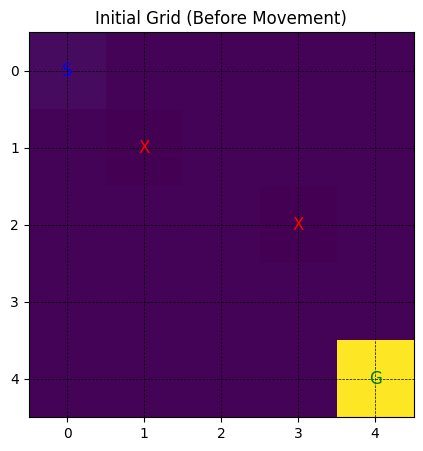

Optimal Path: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4)]


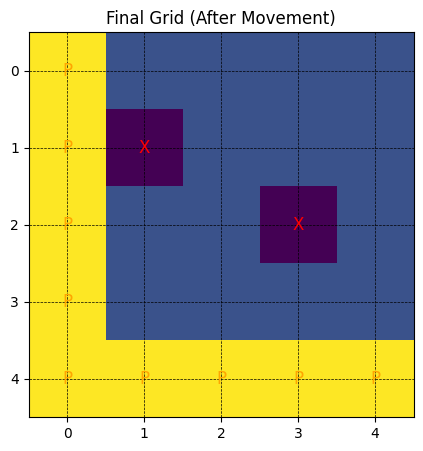

In [9]:
# Visualize the initial grid before the agent moves
visualize_initial_grid(starting_location, ending_location, blocked_locations, rows, cols)

# Train the Q-table and get the optimal path
Q = train(epochs)
optimal_path = get_optimal_path(starting_location, ending_location, Q)
print(f"Optimal Path: {optimal_path}")

# Visualize the final grid after the agent moves
visualize_final_grid(optimal_path, starting_location, ending_location, blocked_locations, rows, cols)